# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc ,r2_score , accuracy_score,f1_score , roc_auc_score ,confusion_matrix


import matplotlib.pyplot as plt


F:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Importing data
#your_local_path = "F:/kanchan/job 2019/for GIT/Loan_Prediction/"
df = pd.read_csv ("loan-prediction.csv")

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [4]:
df = df.drop('Loan_ID', 1)
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
#converting non numerical values to numeric
df["Gender"]= df["Gender"].apply(lambda Gender:0 if Gender == 'Male' else 1)
df["Married"]= df["Married"].apply(lambda Married:0 if Married == 'No' else 1)
df["Education"]= df["Education"].apply(lambda Education:0 if Education== 'Not Graduate' else 1)
df["Self_Employed"]= df["Self_Employed"].apply(lambda Self_Employed:0 if Self_Employed== 'No' else 1)
df["Loan_Status"]= df["Loan_Status"].apply(lambda Loan_Status:0 if Loan_Status== 'N' else 1)
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,NaN,360.0,1.0,Urban,1
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,Urban,1
6,0,1,0,0,0,2333,1516.0,95.0,360.0,1.0,Urban,1
7,0,1,3+,1,0,3036,2504.0,158.0,360.0,0.0,Semiurban,0
8,0,1,2,1,0,4006,1526.0,168.0,360.0,1.0,Urban,1
9,0,1,1,1,0,12841,10968.0,349.0,360.0,1.0,Semiurban,0


In [6]:
#creaing dummy variables
Property_Area_dummies = pd.get_dummies(df.Property_Area, prefix='Property_Area', drop_first= True)
df = pd.concat([df, Property_Area_dummies], axis=1)

Dependents_dummies = pd.get_dummies(df.Dependents, prefix='Dependents', drop_first= True)
df = pd.concat([df, Dependents_dummies], axis=1)

#dropping unnecessary columns
df.drop(['Property_Area','Dependents'], axis=1, inplace=True)

df.head(10)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+
0,0,0,1,0,5849,0.0,NaN,360.0,1.0,1,0,1,0,0,0
1,0,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,0,1,0,0
2,0,1,1,1,3000,0.0,66.0,360.0,1.0,1,0,1,0,0,0
3,0,1,0,0,2583,2358.0,120.0,360.0,1.0,1,0,1,0,0,0
4,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,0,1,0,0,0
5,0,1,1,1,5417,4196.0,267.0,360.0,1.0,1,0,1,0,1,0
6,0,1,0,0,2333,1516.0,95.0,360.0,1.0,1,0,1,0,0,0
7,0,1,1,0,3036,2504.0,158.0,360.0,0.0,0,1,0,0,0,1
8,0,1,1,0,4006,1526.0,168.0,360.0,1.0,1,0,1,0,1,0
9,0,1,1,0,12841,10968.0,349.0,360.0,1.0,0,1,0,1,0,0


In [7]:
df.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.203583,0.653094,0.781759,0.185668,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296,0.379479,0.328990,0.166124,0.164495,0.083062
std,0.402991,0.476373,0.413389,0.389155,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973,0.485653,0.470229,0.372495,0.371027,0.276201
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#getting the list of columns with missing values
ml= df.columns[df.isna().any()].tolist()
ml

['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [9]:
# Exploring data , finding unique values in each Loan_Amount_Term
np.unique(df[['Loan_Amount_Term']].values)

array([ 12.,  36.,  60.,  84., 120., 180., 240., 300., 360., 480.,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan])

In [10]:
# Making copy of the file
df1=df.copy()

#filling na values with ration values
for item in  ml:    
    #getting the ratio of the index labels
    val =pd.DataFrame(df[item].value_counts(normalize=True))
    print ("The probability ratio before filling the missing vlaues in %s is" % item )
    print (df[item].value_counts(normalize=True))
    #index labels in a list
    valr = val.index.tolist()
    #drc.index = valr
    #columns values in a list
    valc =val[item].tolist()
    #replacing the nan values with ratio
    df1[item] = df1[item].fillna(pd.Series(np.random.choice(valr,p=valc, size=len(df1))))
    #sanity check
    print ("The probability ratio after filling the missing vlaues in %s is" % item )
    print ((df1[item].value_counts(normalize=True)))
    


The probability ratio before filling the missing vlaues in LoanAmount is
120.0    0.033784
110.0    0.028716
100.0    0.025338
187.0    0.020270
160.0    0.020270
128.0    0.018581
113.0    0.018581
130.0    0.016892
96.0     0.015203
95.0     0.015203
70.0     0.013514
115.0    0.013514
112.0    0.013514
150.0    0.011824
135.0    0.011824
136.0    0.011824
132.0    0.011824
125.0    0.011824
104.0    0.011824
80.0     0.010135
81.0     0.010135
138.0    0.010135
90.0     0.010135
158.0    0.010135
116.0    0.010135
175.0    0.010135
144.0    0.010135
155.0    0.010135
180.0    0.010135
152.0    0.008446
           ...   
315.0    0.001689
101.0    0.001689
73.0     0.001689
142.0    0.001689
48.0     0.001689
164.0    0.001689
83.0     0.001689
191.0    0.001689
166.0    0.001689
495.0    0.001689
59.0     0.001689
214.0    0.001689
240.0    0.001689
72.0     0.001689
42.0     0.001689
349.0    0.001689
280.0    0.001689
405.0    0.001689
279.0    0.001689
304.0    0.001689
650.0    

In [11]:
#getting the list of columns with missing values
ml= df1.columns[df1.isna().any()].tolist()
ml

[]

In [12]:
# Filling LoanAmount columns with median
df1 = df1.fillna(df1.median())

#getting the list of columns with missing values
ml = df1.columns[df1.isna().any()].tolist()
ml

[]

In [13]:
# Converting all columns to integer
df1["CoapplicantIncome"] = df1['CoapplicantIncome'].astype('int')
df1["LoanAmount"] = df1['LoanAmount'].astype('int')
df1["Loan_Amount_Term"] = df1['Loan_Amount_Term'].astype('int')
df1["Credit_History"] = df1['Credit_History'].astype('int')
df1.head(10)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+
0,0,0,1,0,5849,0,111,360,1,1,0,1,0,0,0
1,0,1,1,0,4583,1508,128,360,1,0,0,0,1,0,0
2,0,1,1,1,3000,0,66,360,1,1,0,1,0,0,0
3,0,1,0,0,2583,2358,120,360,1,1,0,1,0,0,0
4,0,0,1,0,6000,0,141,360,1,1,0,1,0,0,0
5,0,1,1,1,5417,4196,267,360,1,1,0,1,0,1,0
6,0,1,0,0,2333,1516,95,360,1,1,0,1,0,0,0
7,0,1,1,0,3036,2504,158,360,0,0,1,0,0,0,1
8,0,1,1,0,4006,1526,168,360,1,1,0,1,0,1,0
9,0,1,1,0,12841,10968,349,360,1,0,1,0,1,0,0


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
Gender                     614 non-null int64
Married                    614 non-null int64
Education                  614 non-null int64
Self_Employed              614 non-null int64
ApplicantIncome            614 non-null int64
CoapplicantIncome          614 non-null int32
LoanAmount                 614 non-null int32
Loan_Amount_Term           614 non-null int32
Credit_History             614 non-null int32
Loan_Status                614 non-null int64
Property_Area_Semiurban    614 non-null uint8
Property_Area_Urban        614 non-null uint8
Dependents_1               614 non-null uint8
Dependents_2               614 non-null uint8
Dependents_3+              614 non-null uint8
dtypes: int32(4), int64(6), uint8(5)
memory usage: 41.5 KB


In [15]:
#Checking correlation between all the columns
corr = df1.corr()
corr

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+
Gender,1.000000,-0.336818,0.061497,0.039440,-0.013933,-0.082316,-0.067141,0.070439,-0.011583,-0.025407,0.113069,-0.044109,-0.008319,-0.126145,-0.064234
Married,-0.336818,1.000000,-0.012304,-0.021584,0.051708,0.075947,0.151358,-0.107457,0.018716,0.091478,0.005845,0.000546,0.113853,0.249547,0.132566
Education,0.061497,-0.012304,1.000000,0.019059,0.140760,0.062290,0.169505,0.065206,0.060423,0.085884,0.039410,0.034279,0.013355,-0.020822,-0.055288
Self_Employed,0.039440,-0.021584,0.019059,1.000000,0.121356,0.028834,0.109802,-0.038677,0.025108,0.005857,-0.010881,-0.013416,0.079472,0.025393,-0.007119
ApplicantIncome,-0.013933,0.051708,0.140760,0.121356,1.000000,-0.116604,0.543118,-0.045965,-0.024073,-0.004710,-0.014246,-0.000598,0.040861,-0.034650,0.156687
CoapplicantIncome,-0.082316,0.075947,0.062290,0.028834,-0.116604,1.000000,0.190155,-0.060247,0.012205,-0.059188,-0.027043,0.022775,-0.029769,0.010015,0.041491
LoanAmount,-0.067141,0.151358,0.169505,0.109802,0.543118,0.190155,1.000000,0.032808,-0.015181,-0.026896,0.009825,-0.041952,0.062001,0.021181,0.145098
Loan_Amount_Term,0.070439,-0.107457,0.065206,-0.038677,-0.045965,-0.060247,0.032808,1.000000,-0.020089,-0.023369,0.059805,-0.092408,-0.087054,-0.009849,-0.076150
Credit_History,-0.011583,0.018716,0.060423,0.025108,-0.024073,0.012205,-0.015181,-0.020089,1.000000,0.540576,0.038388,-0.026113,-0.008601,0.025436,-0.062197
Loan_Status,-0.025407,0.091478,0.085884,0.005857,-0.004710,-0.059188,-0.026896,-0.023369,0.540576,1.000000,0.136540,-0.043621,-0.038740,0.062384,-0.026123


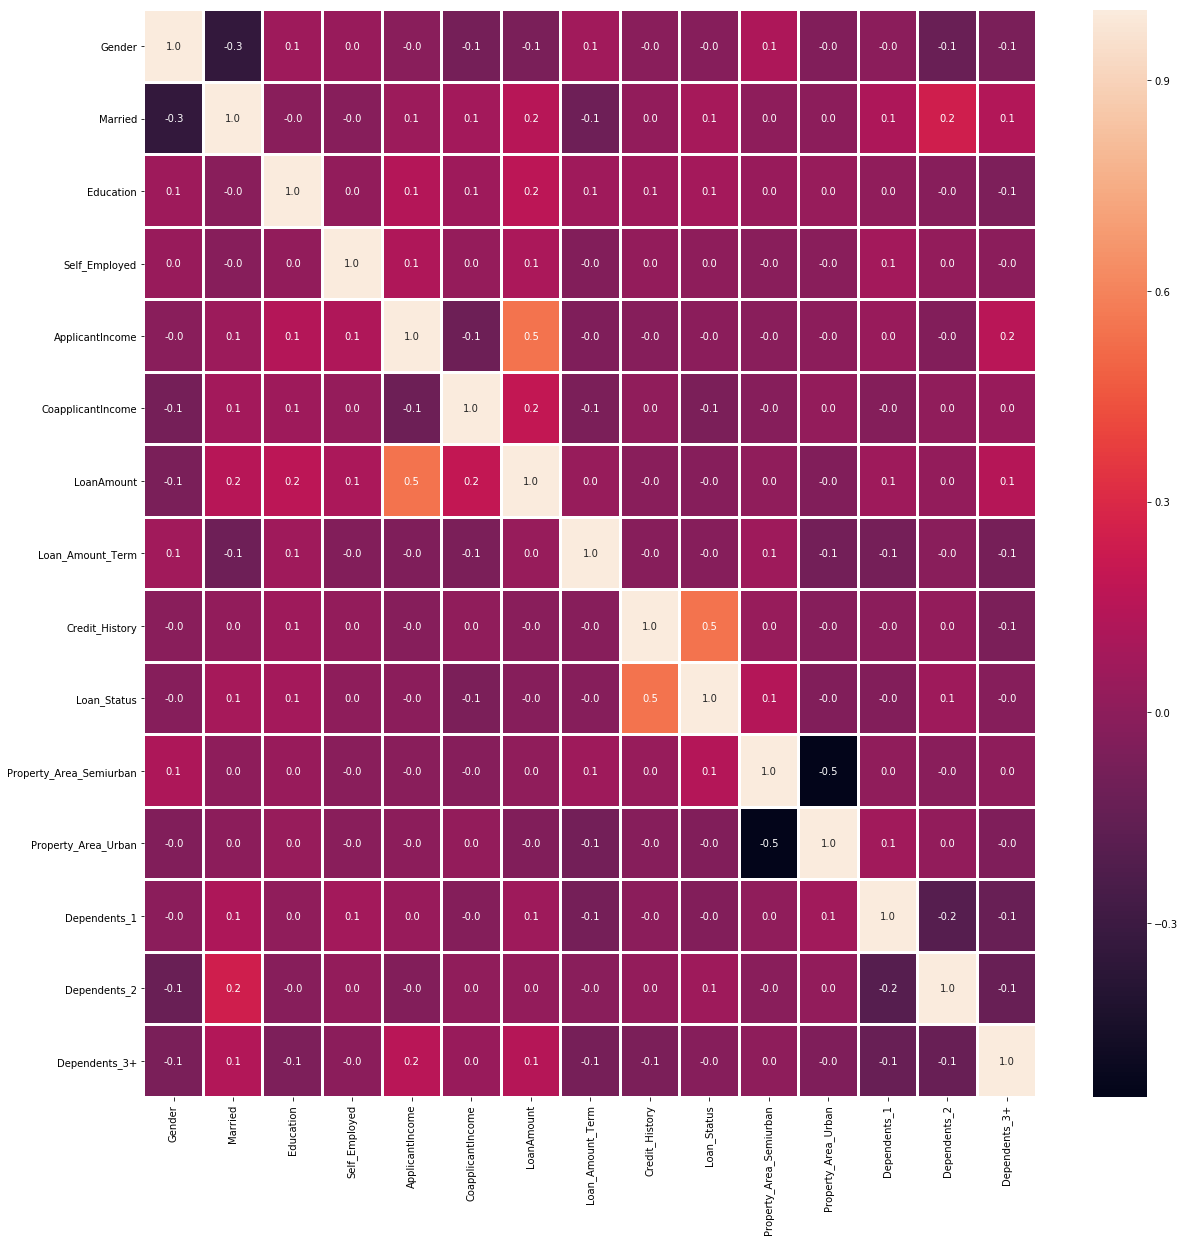

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True,fmt='.1f',linewidths=2)

# Modelling

In [17]:
# Defining independant and dependant variables
input_cols = ['Gender','Married','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area_Semiurban','Property_Area_Urban','Dependents_1','Dependents_2','Dependents_3+']
output_variable = ['Loan_Status']
X = df1[input_cols]
Y = df1[output_variable]

In [18]:
#defining a function for adjusted r square
def adjustedR(Ytest,ypredict,n,p):
    r2 = r2_score(Ytest,ypredict)
    adjustedr2 = 1-((1-r2)*((n-1)/(n-p-1)))
    #where n is number of observations in sample and p is number of independent variables in model
    return adjustedr2

In [19]:
#defing the ROC curve
def ROCcurve(fpr, tpr):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    return (plt.show())

In [20]:
#Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=123)

In [21]:
#listing out the different ML Algorithms
models = []
#creating tupeles and initializing the algorithms
models.append(('Logistic Regression', LogisticRegression(C=0.3, penalty='l1',random_state= 7))) 
models.append(('KNN', KNeighborsClassifier(n_neighbors=10)))
models.append(('Random Forest with Entropy', RandomForestClassifier(n_estimators=500, criterion= "entropy", random_state= 7)))
models.append(('Random Forest with gini', RandomForestClassifier(n_estimators=500, criterion= "gini", random_state= 7)))
models.append(('DecisionTree with entropy', DecisionTreeClassifier(criterion= "entropy", random_state= 7)))
models.append(('DecisionTree with gini', DecisionTreeClassifier(criterion= "gini", random_state= 7)))
models.append(('Gaussian Naive Bayes', GaussianNB()))
models.append(('XGBoost', XGBClassifier(seed=7,learning_rate=0.01,max_depth=1000,n_estimators=00)))

In [22]:
#function to run the models for the datasets
def allmodels():
    #creating dataframe
    model_list = pd.DataFrame(columns=("Model","Accuracy","F1Score","AUC","Diff of Adj R and R"))
    #indexing
    rownumber = 0
    for name, model in models:
        classifier = model #refering the tuple
        classifier.fit(X_train, Y_train)
        
        # prediction
        Y_predict = classifier.predict(X_test)
        fpr, tpr, thresholds = roc_curve(Y_test, Y_predict, pos_label=1)
        print (name)
        ROCcurve(fpr, tpr)
        #checking r square value
        r2 = abs(r2_score(Y_test,Y_predict))
        #checking adjusted r square value
        adjustedr = abs(adjustedR(Y_test,Y_predict,len(df1),len(df1.columns)))
        #filling the dataframe
        model_list.loc[rownumber,"Model"]= name
        model_list.loc[rownumber,"Accuracy"] = round(((accuracy_score(Y_test,Y_predict))*100))
        model_list.loc[rownumber,"F1Score"]= round((f1_score(Y_test,Y_predict)),2)
        model_list.loc[rownumber,"AUC"]= round((roc_auc_score(Y_test,Y_predict)),3)
        model_list.loc[rownumber,"Diff of Adj R and R"] = round ((adjustedr-r2),3)
        print (confusion_matrix(Y_test,Y_predict))
        #filling data to next row
          
        rownumber += 1
        #sorting the AOC values in ascending order
    return (model_list.sort_values(by="AUC",ascending=False))

F:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression


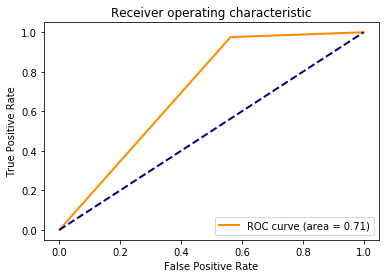

[[ 28  36]
 [  3 118]]
KNN


F:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


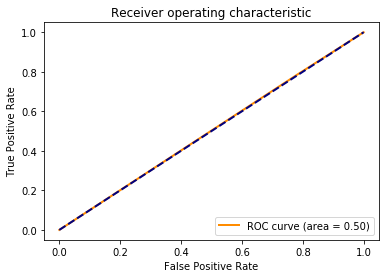

[[14 50]
 [26 95]]


F:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Random Forest with Entropy


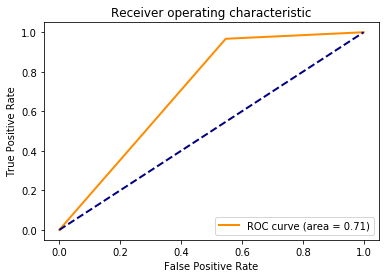

[[ 29  35]
 [  4 117]]


F:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Random Forest with gini


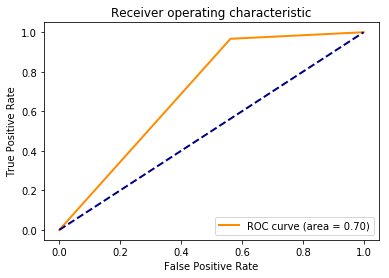

[[ 28  36]
 [  4 117]]
DecisionTree with entropy


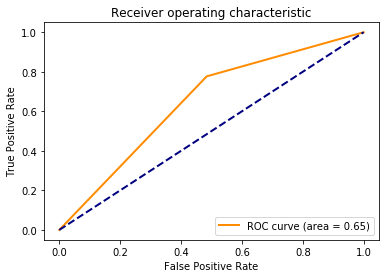

[[33 31]
 [27 94]]
DecisionTree with gini


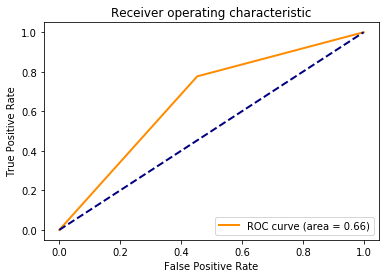

[[35 29]
 [27 94]]
Gaussian Naive Bayes


F:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


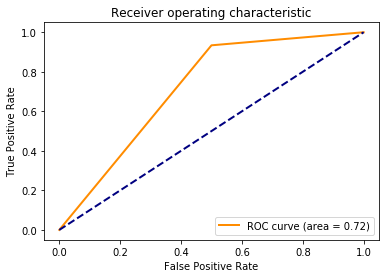

[[ 32  32]
 [  8 113]]


F:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBoost


F:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


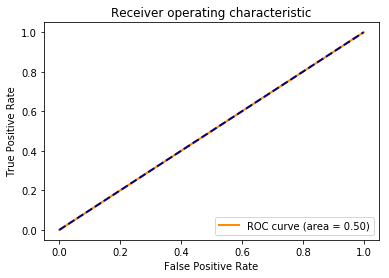

[[ 64   0]
 [121   0]]
                        Model Accuracy F1Score    AUC Diff of Adj R and R
6        Gaussian Naive Bayes       78    0.85  0.717              -0.024
2  Random Forest with Entropy       79    0.86   0.71              -0.023
0         Logistic Regression       79    0.86  0.706              -0.023
3     Random Forest with gini       78    0.85  0.702              -0.024
5      DecisionTree with gini       70    0.77  0.662               0.034
4   DecisionTree with entropy       69    0.76  0.646               0.035
1                         KNN       59    0.71  0.502               0.046
7                     XGBoost       35       0    0.5               0.073


F:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
print (allmodels())

From the  above table we can understand that compartively XG algorithm gives the best AUC value, F1 score and lowest difference between adjusted r square and r square.

But the AUC value is still very low. Lets see if we can improve it further by hyperparameter tuning.

In [24]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6]
        }

gsearch = GridSearchCV(estimator = XGBClassifier( learning_rate=0.01, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=7), 
                       
 param_grid = params, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch.fit(X_train,Y_train)
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

F:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.72459, std: 0.06058, params: {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.6},
  mean: 0.72043, std: 0.04962, params: {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.8},
  mean: 0.71253, std: 0.04347, params: {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1.0},
  mean: 0.73438, std: 0.06192, params: {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.6},
  mean: 0.72529, std: 0.06064, params: {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.8},
  mean: 0.71659, std: 0.05010, params: {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 1.0},
  mean: 0.54999, std: 0.11075, params: {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.6},
  mean: 0.74060, std: 0.06286, params: {

# Conclusion



After grid search the AUC value has further increased to .749